# **Unlocking the Secrets of Used Car Pricing: Key Factors that Drive Value**

**OVERVIEW**

In this project, we dive into a dataset sourced from Kaggle that initially included details on over 3 million used cars. For the purposes of our analysis and to optimize processing speed, we will work with a streamlined subset containing data on approximately 426,000 vehicles. The primary objective is to uncover the key factors that influence a car's price. By analyzing these variables, we aim to deliver actionable recommendations to our client—a used car dealership—enabling them to better understand consumer preferences and optimize their inventory and pricing strategies.

Through our analysis, we will identify the features that consumers prioritize when evaluating used cars, ultimately guiding the dealership on which types of cars to stock and how to price them competitively.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

**Goal**

The goal of this project is to figure out which factors have the biggest impact on the price of used cars. To do this, we'll take a dataset that includes details like the car's manufacturer, model, age, mileage, and other features, and analyze how these variables are related to price. By using regression models and machine learning techniques, we’ll be able to measure the importance of each factor and predict car prices more accurately. The process involves cleaning and preparing the data, creating new features if needed, building and testing models, and evaluating how well they perform. This analysis will help us provide insights that used car dealerships can use to improve their pricing strategies.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [35]:
# Importing necessary libraries

# Data Manipulation and Analysis libraries
import pandas as pd
import numpy as np

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
from sklearn.metrics import roc_curve
from sklearn.model_selection import learning_curve

#Suppressing warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Set visualization style
sns.set(style="whitegrid")
plt.style.use('ggplot')

# Confirmation message to verify successful imports
print("✅ All necessary libraries have been successfully imported!")

✅ All necessary libraries have been successfully imported!


In [36]:
# Step 1 Load dataset
#from google.colab import drive
#drive.mount('/content/drive')

# Load dataset
#file_path = '/content/drive/MyDrive/data/vehicles.csv'  # Update the path to your dataset location
data = pd.read_csv('/data/vehicles.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading our data that we will review.


🔍 Preview of the first few rows:


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc



ℹ️ Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 no

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
154871,7308389161,south bend / michiana,7500,2012.0,mazda,3,excellent,NaN,gas,75011.0,rebuilt,automatic,NaN,fwd,compact,hatchback,silver,in
406469,7311927750,olympic peninsula,25999,2019.0,dodge,charger,NaN,6 cylinders,gas,45930.0,clean,automatic,2C3CDXBG1KH657722,rwd,NaN,sedan,custom,wa
252241,7305320997,central NJ,22645,2014.0,bmw,428 i,NaN,NaN,gas,77514.0,clean,automatic,WBA3V5C58EP747991,NaN,NaN,other,black,nj
29757,7303142676,imperial county,0,2015.0,chevrolet,silverado 1500,NaN,8 cylinders,gas,93775.0,clean,automatic,1GCVKREC7FZ420429,4wd,NaN,truck,NaN,ca
47657,7306374379,redding,21997,2007.0,toyota,4runner sport edition 4dr suv 1-oregon owner*r...,NaN,6 cylinders,gas,171525.0,clean,automatic,JTEBU14RX78083407,4wd,NaN,SUV,white,ca
4237,7307168620,mobile,26690,2016.0,toyota,tacoma,NaN,6 cylinders,gas,142702.0,clean,automatic,NaN,4wd,compact,pickup,silver,al
287384,7309828085,akron / canton,26990,2014.0,lexus,ls 460 sedan 4d,good,NaN,other,80984.0,clean,automatic,JTHBL5EF7E5132840,rwd,NaN,sedan,red,oh
365705,7312138406,austin,21500,2014.0,gmc,sierra 1500,like new,8 cylinders,gas,145000.0,clean,automatic,NaN,rwd,full-size,truck,black,tx
298255,7315302030,dayton / springfield,27590,2020.0,volkswagen,golf gti s hatchback,good,NaN,gas,1309.0,clean,other,3VW6T7AU5LM008606,fwd,NaN,sedan,red,oh
204043,7303236680,jackson,29995,2015.0,honda,odyssey ex-l,NaN,NaN,gas,22082.0,clean,automatic,5FNRL5H61FB088863,NaN,NaN,NaN,NaN,mi



📉 Percentage of Missing Values:
year             0.282281
transmission     0.598763
fuel             0.705819
odometer         1.030735
model            1.236179
title_status     1.930753
manufacturer     4.133714
type            21.752717
paint_color     30.501078
drive           30.586347
VIN             37.725356
condition       40.785232
cylinders       41.622470
size            71.767476
dtype: float64

🔍 Visualizing Missing Data Heatmap


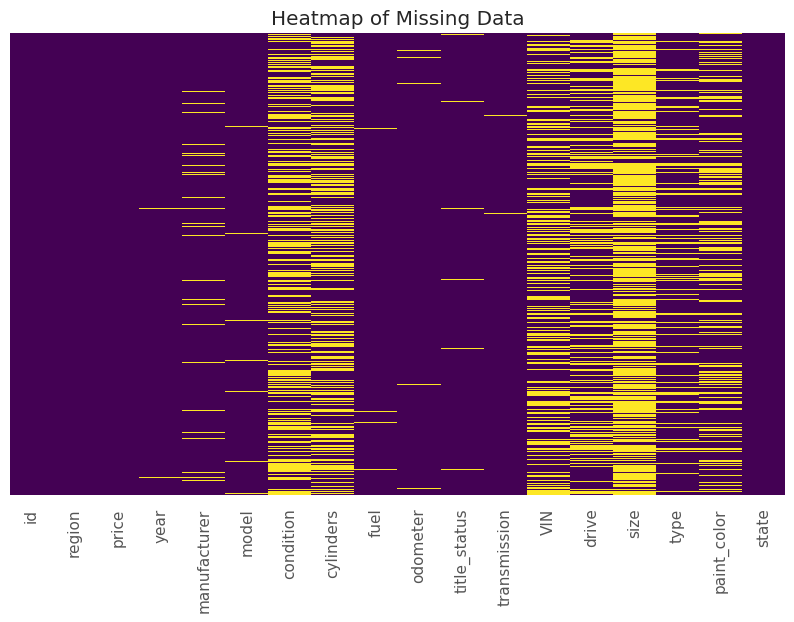


📊 Visualizing Percentage of Missing Values by Feature


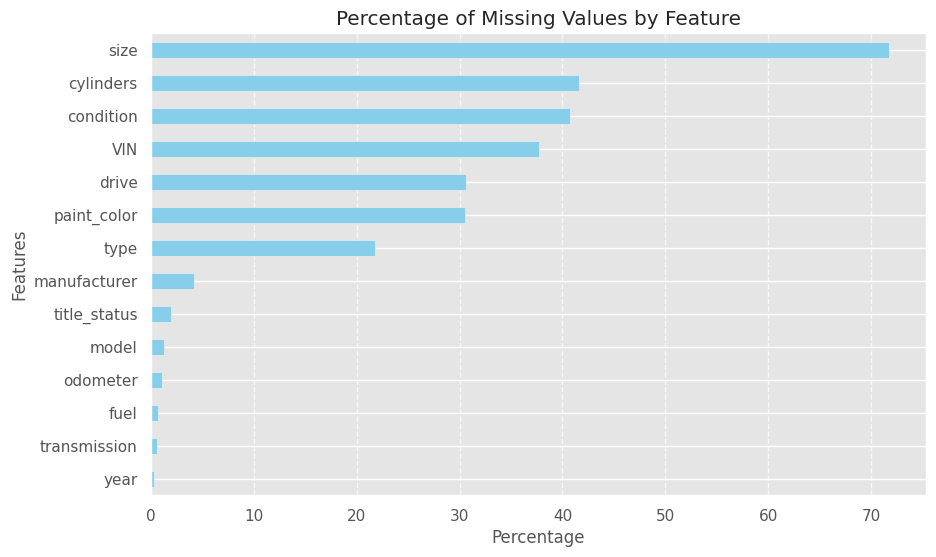

In [37]:
# Step 1: Display the first few rows of the dataset
print("\n🔍 Preview of the first few rows:")
display(data.head())

# Step 2: Display dataset information
print("\nℹ️ Dataset Information:")
data.info()

# Step 3: Display a random sample of 10 rows to better understand the data
print("\n📊 Displaying a random sample of 10 rows:")
np.random.seed(1)
display(data.sample(n=10))

# Step 4: Calculate and display the percentage of missing values for each column
print("\n📉 Percentage of Missing Values:")
missing_percentage = data.isna().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values()
print(missing_percentage)

# Step 5: Visualize Missing Data using a heatmap
print("\n🔍 Visualizing Missing Data Heatmap")
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Data")
plt.show()

#missing_percentage = data.isnull().mean() * 100
#missing_percentage = missing_percentage[missing_percentage > 0]
#missing_percentage.sort_values(inplace=True)

# Step 6: Visualize missing values as a bar chart (if there are missing values)
if not missing_percentage.empty:
    print("\n📊 Visualizing Percentage of Missing Values by Feature")
    plt.figure(figsize=(10, 6))
    missing_percentage.plot(kind='barh', color='skyblue')
    plt.title("Percentage of Missing Values by Feature")
    plt.xlabel("Percentage")
    plt.ylabel("Features")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("✅ No missing values detected.")


**Observations:**

The random dataset looks more complete than the first five entries, however, there seems to be missing data. To get a understanding of how much missing data there is we need to create a heat map of missing data.

🔍 Observations:
The dataset appears to have missing values, and there may be outliers in the 'price' feature.
We'll visualize missing data and analyze the distribution of the 'price' column to detect outliers.

📉 Heatmap of Missing Data


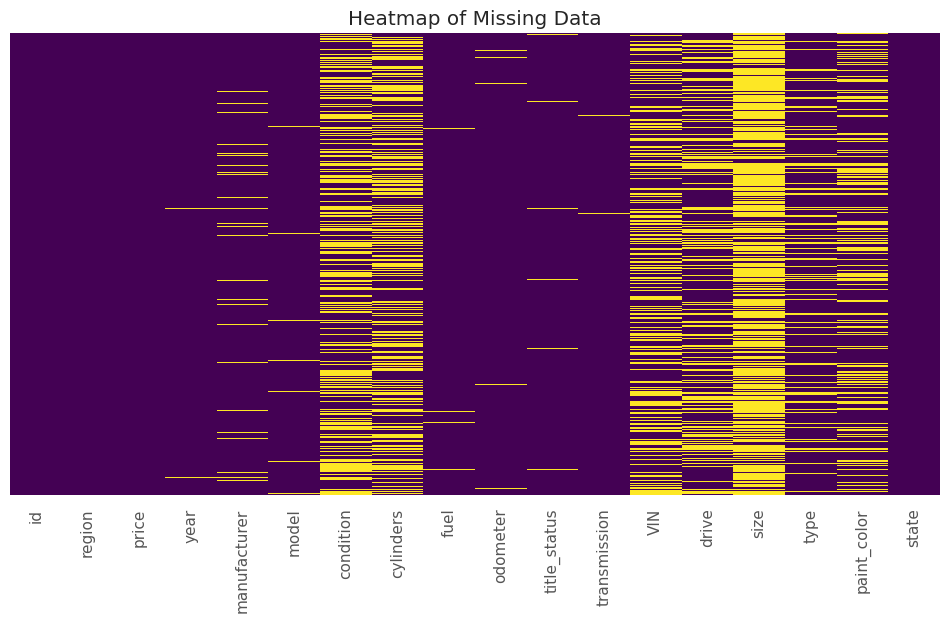


📊 Bar Chart of Missing Values by Feature


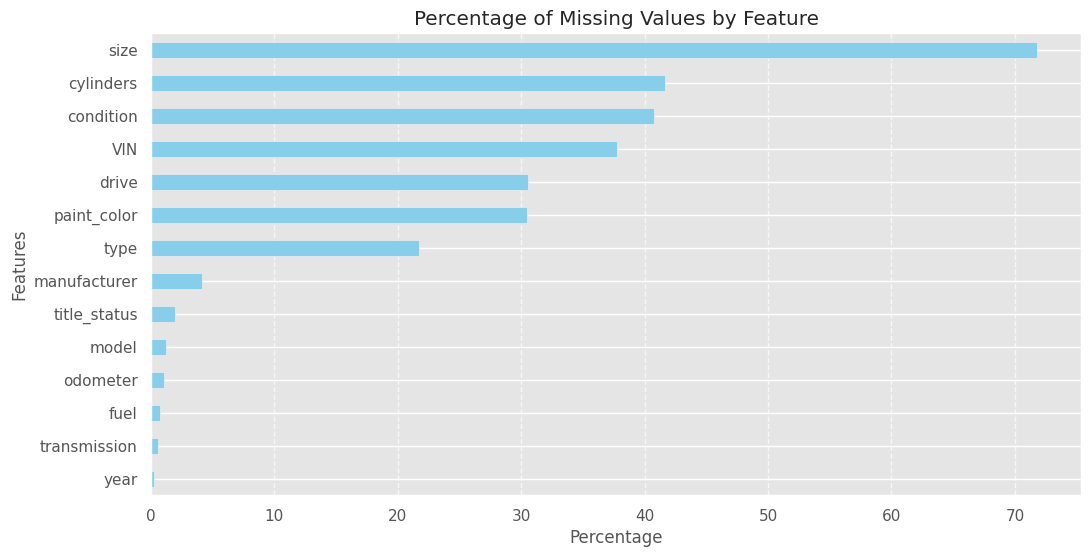


📉 Outlier Detection for 'Price'


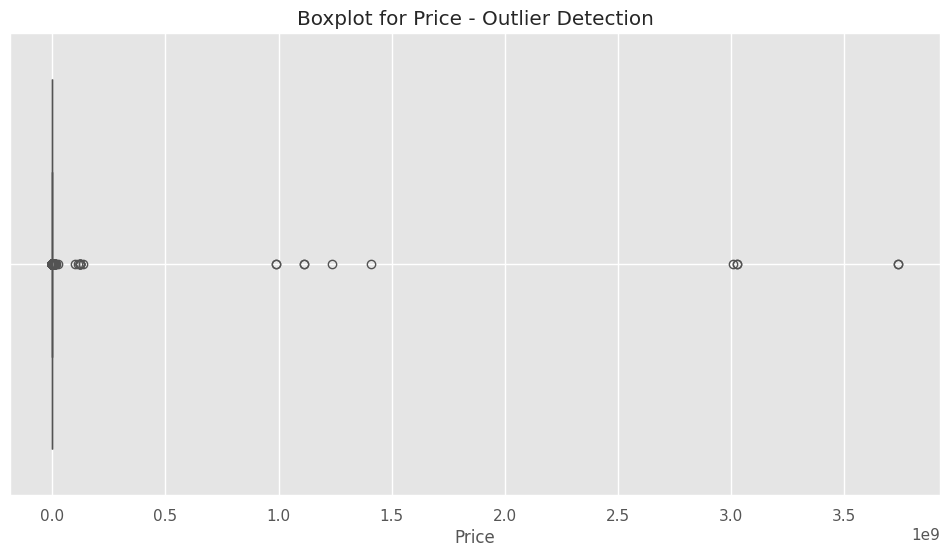


📊 Price Distribution (Before Removing Outliers)


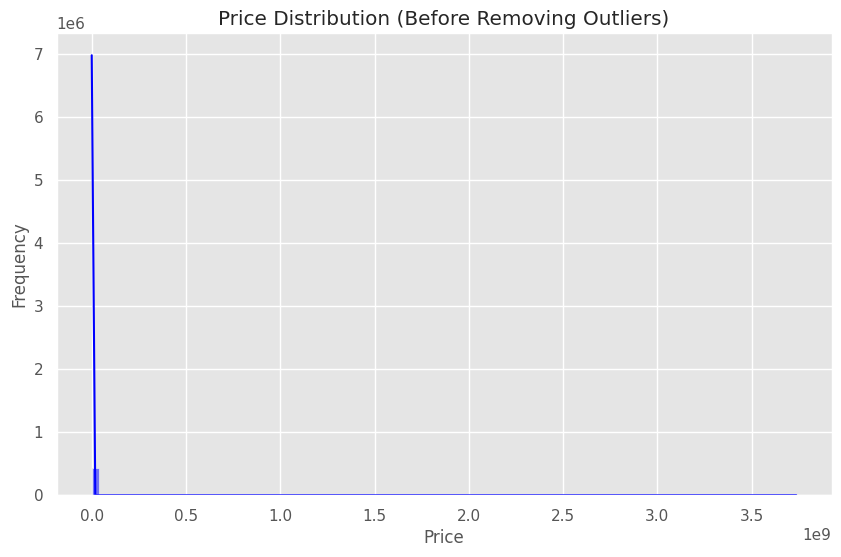

In [38]:
# Observations and Visualizations
print("🔍 Observations:")
print("The dataset appears to have missing values, and there may be outliers in the 'price' feature.")
print("We'll visualize missing data and analyze the distribution of the 'price' column to detect outliers.\n")

# Step 1: Visualize Missing Data
print("📉 Heatmap of Missing Data")
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Data")
plt.show()

# Step 2: Show the Distribution of Missing Data by Feature
missing_percentage = data.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values()

if not missing_percentage.empty:
    print("\n📊 Bar Chart of Missing Values by Feature")
    plt.figure(figsize=(12, 6))
    missing_percentage.plot(kind='barh', color='skyblue')
    plt.title("Percentage of Missing Values by Feature")
    plt.xlabel("Percentage")
    plt.ylabel("Features")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("✅ No missing values detected.")

# Step 3: Outlier Detection for 'Price' Feature
print("\n📉 Outlier Detection for 'Price'")
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['price'])
plt.title("Boxplot for Price - Outlier Detection")
plt.xlabel("Price")
plt.grid(True)
plt.show()

# Step 4: Visualize Price Distribution Before Removing Outliers
print("\n📊 Price Distribution (Before Removing Outliers)")
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=100, kde=True, color='blue')
plt.title("Price Distribution (Before Removing Outliers)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



🔍 Analyzing Price Distribution by Manufacturer


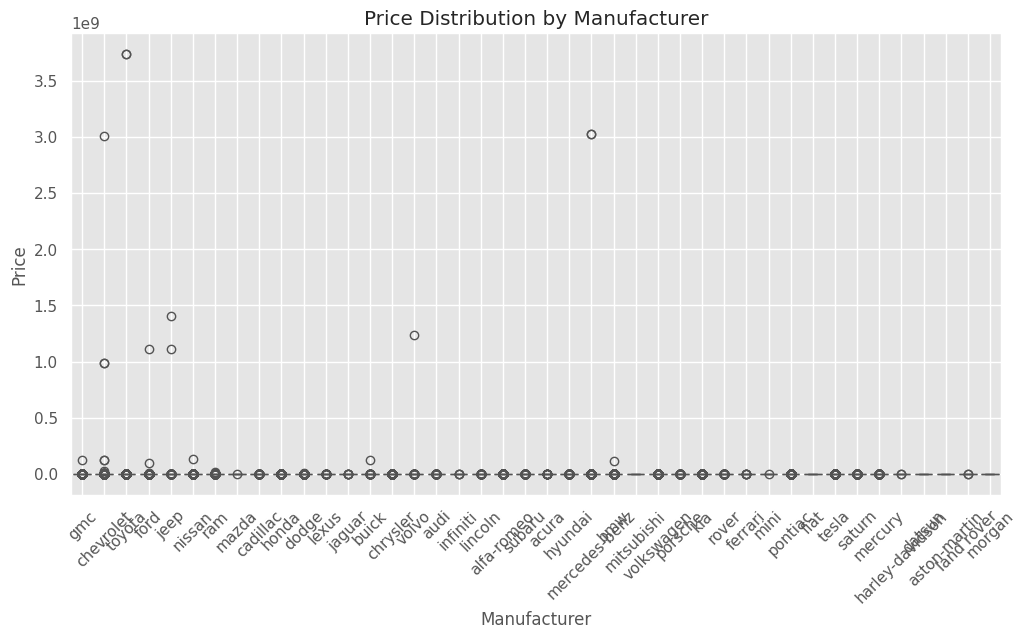


🔍 Checking Car Count by Manufacturer


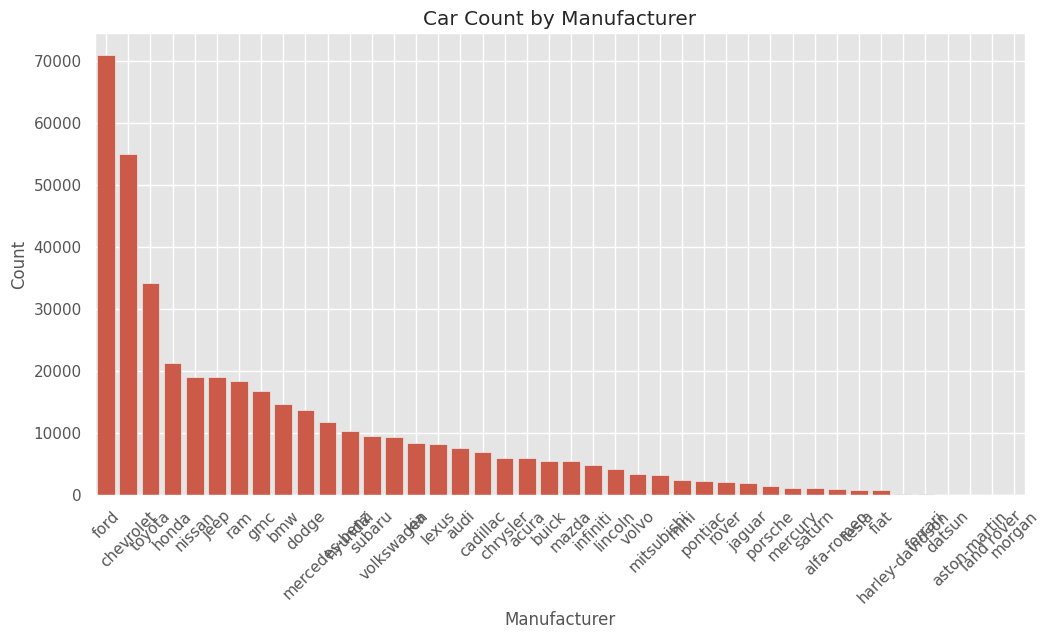


Observations:
- The boxplot helps identify manufacturers with higher or lower price ranges.
- The count plot checks if the dataset is skewed towards any particular manufacturer.

🔍 Analyzing the Impact of Mileage (Odometer) on Price


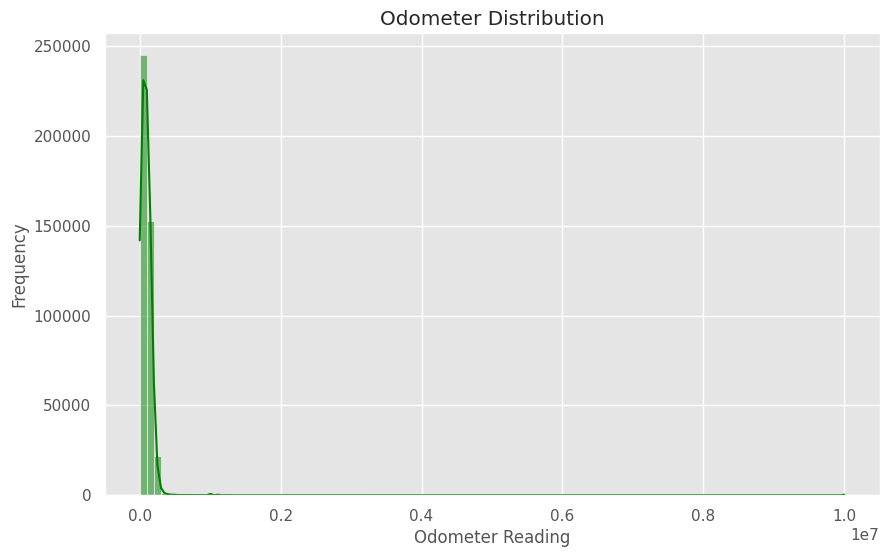


Observations:
- The odometer distribution helps determine if mileage affects the car price.
- We'll explore this further in feature analysis.

📝 List of Available Features in the Dataset:
['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']


In [39]:
# Step 1: Rough Understanding of Price Distribution by Manufacturer
print("\n🔍 Analyzing Price Distribution by Manufacturer")

plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='price', data=data)
plt.xticks(rotation=45)
plt.title("Price Distribution by Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Price")
plt.grid(True)
plt.show()

# Step 2: Check for Skewness in Manufacturer Data
print("\n🔍 Checking Car Count by Manufacturer")
plt.figure(figsize=(12, 6))
sns.countplot(x='manufacturer', data=data, order=data['manufacturer'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Car Count by Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# Observations
print("\nObservations:")
print("- The boxplot helps identify manufacturers with higher or lower price ranges.")
print("- The count plot checks if the dataset is skewed towards any particular manufacturer.")

# Step 3: Analyzing the Impact of Mileage on Price
print("\n🔍 Analyzing the Impact of Mileage (Odometer) on Price")
plt.figure(figsize=(10, 6))
sns.histplot(data['odometer'], bins=100, kde=True, color='green')
plt.title("Odometer Distribution")
plt.xlabel("Odometer Reading")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Observations
print("\nObservations:")
print("- The odometer distribution helps determine if mileage affects the car price.")
print("- We'll explore this further in feature analysis.")

# Step 4: Display List of Available Features in the Dataset
print("\n📝 List of Available Features in the Dataset:")
variable_list = data.columns.tolist()
print(variable_list)



This provides an initial overview of the missing data and highlights potential correlations between price and other features. Further data cleaning and a more in-depth analysis will be needed to draw meaningful conclusions."

### Data Preparation
Following our initial exploration and refinement of the business objectives, it’s now time to prepare our final dataset for modeling. In this step, we will address any data integrity issues, clean the dataset, engineer new features, and apply necessary transformations (such as scaling, logarithms, or normalization). This process ensures that the data is fully prepared for modeling using scikit-learn.

🔍 Cleaning the dataset by removing rows with missing values and filtering unrealistic prices and years.


<ipython-input-40-9d102846b098>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['age'] = 2024 - data_cleaned['year']


Sampling 10,000 rows for efficient processing...


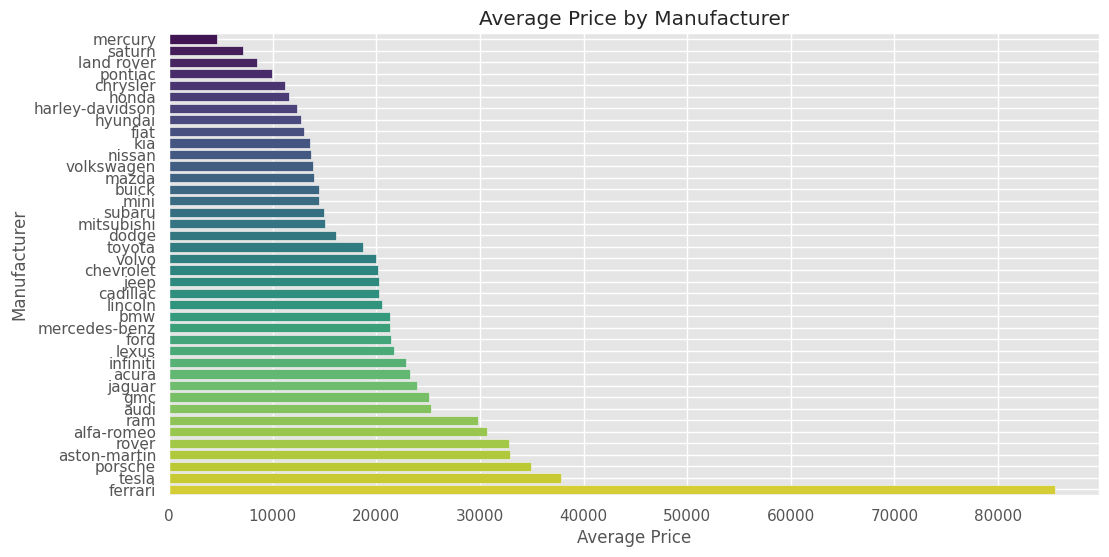

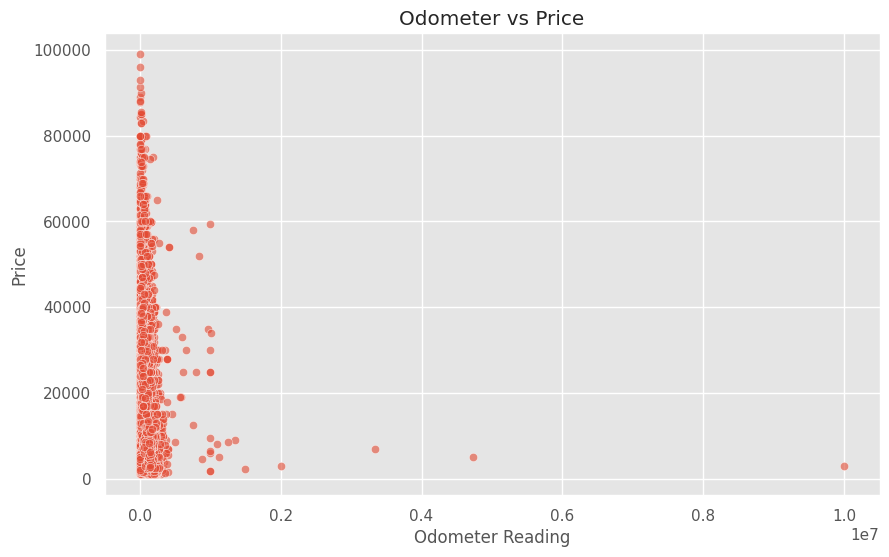

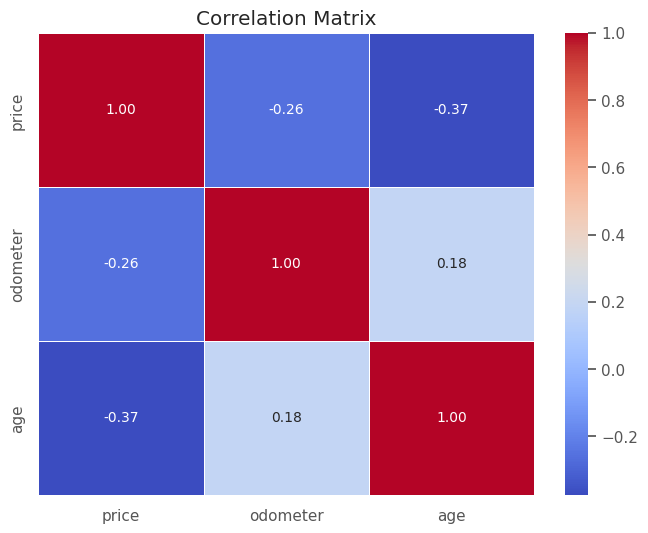

🔄 Performing One-Hot Encoding on categorical features...
🔄 Combining numerical and encoded categorical features...
🔍 Applying variance threshold to filter low variance features...
✅ Features selected after filtering: 48 features retained.


In [40]:
# Data Cleaning and Initial Feature Engineering
# Step 1: Remove rows with missing critical values and filter out unrealistic entries
print("🔍 Cleaning the dataset by removing rows with missing values and filtering unrealistic prices and years.")
data_cleaned = data.dropna(subset=['price', 'year', 'odometer']).copy()
data_cleaned = data_cleaned[(data_cleaned['price'] > 1000) & (data_cleaned['price'] < 100000)]
data_cleaned = data_cleaned[(data_cleaned['year'] > 1900) & (data_cleaned['year'] <= 2024)]

# Step 2: Create 'age' feature
data_cleaned['age'] = 2024 - data_cleaned['year']

# Step 3: Sampling for efficiency
print(f"Sampling 10,000 rows for efficient processing...")
data_sampled = data_cleaned.sample(n=10000, random_state=42)

# Step 4: Manufacturer vs Price Analysis
plt.figure(figsize=(12, 6))
manufacturer_avg_price = data_sampled.groupby('manufacturer')['price'].mean().sort_values()
sns.barplot(x=manufacturer_avg_price.values, y=manufacturer_avg_price.index, palette='viridis')
plt.title("Average Price by Manufacturer")
plt.xlabel("Average Price")
plt.ylabel("Manufacturer")
plt.grid(True)
plt.show()

# Step 5: Analyzing Impact of Odometer on Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_sampled, x='odometer', y='price', alpha=0.6)
plt.title("Odometer vs Price")
plt.xlabel("Odometer Reading")
plt.ylabel("Price")
plt.grid(True)
plt.show()

# Step 6: Correlation Matrix for Numerical Features
numerical_features = ['price', 'odometer', 'age']
correlation_matrix = data_sampled[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Limiting categories for One-Hot Encoding
categorical_columns = ['manufacturer', 'model', 'condition', 'fuel', 'transmission', 'drive', 'type', 'paint_color']
top_n = 10
for col in categorical_columns:
    top_categories = data_sampled[col].value_counts().index[:top_n]
    data_sampled[col] = data_sampled[col].where(data_sampled[col].isin(top_categories), 'Other')

# One-Hot Encoding with sparse output
print("🔄 Performing One-Hot Encoding on categorical features...")
encoder = OneHotEncoder(drop='first', sparse_output=True, handle_unknown='ignore')
X_encoded_sparse = encoder.fit_transform(data_sampled[categorical_columns])

# Combine numerical features with encoded features
print("🔄 Combining numerical and encoded categorical features...")
X_numerical = data_sampled[['age', 'odometer']].values
X_combined = np.hstack([X_encoded_sparse.toarray(), X_numerical])
y = data_sampled['price']

# Variance Threshold Filtering
print("🔍 Applying variance threshold to filter low variance features...")
selector = VarianceThreshold(threshold=0.01)
X_filtered_sparse = selector.fit_transform(X_combined)

# Correctly map feature names after variance filtering
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)
all_feature_names = list(encoded_feature_names) + ['age', 'odometer']
selected_features = selector.get_support(indices=True)
final_feature_names = [all_feature_names[i] for i in selected_features]

print(f"✅ Features selected after filtering: {len(final_feature_names)} features retained.")

# Ensure feature names match filtered features
if len(final_feature_names) != X_filtered_sparse.shape[1]:
    raise ValueError(f"Mismatch: {len(final_feature_names)} feature names but {X_filtered_sparse.shape[1]} filtered features.")


### Modeling

Now that your dataset is nearly finalized, it’s time to dive into model building. At this stage, you'll create a range of regression models using price as the target variable. As you develop these models, be sure to experiment with different parameters and perform cross-validation to ensure robust results.


Cross-Validation Mean MSE for Models:
Linear Regression: 120453453.11
Lasso Regression: 120452136.31
Random Forest: 58518383.07


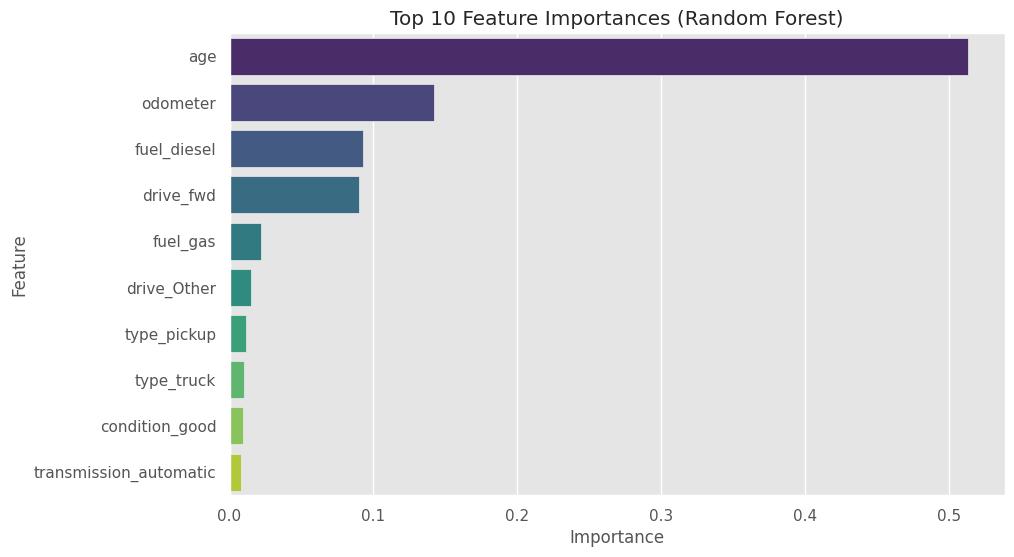


Interpreting Coefficients for Linear Regression:


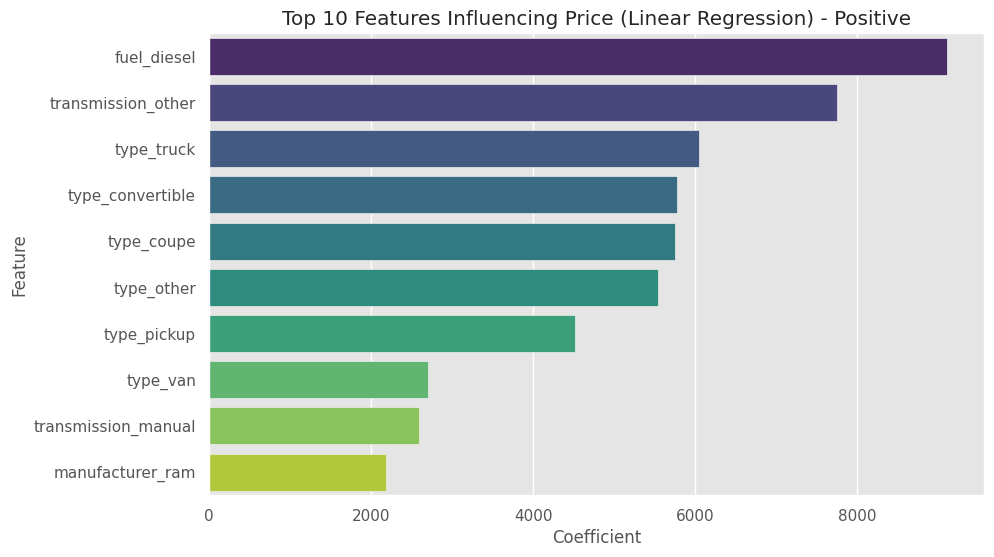

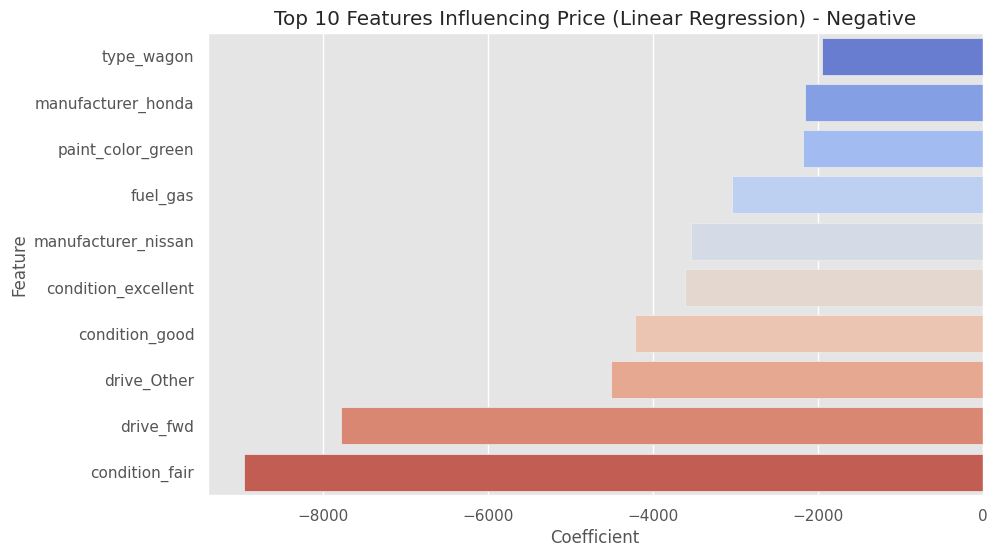


Interpreting Coefficients for Lasso Regression:


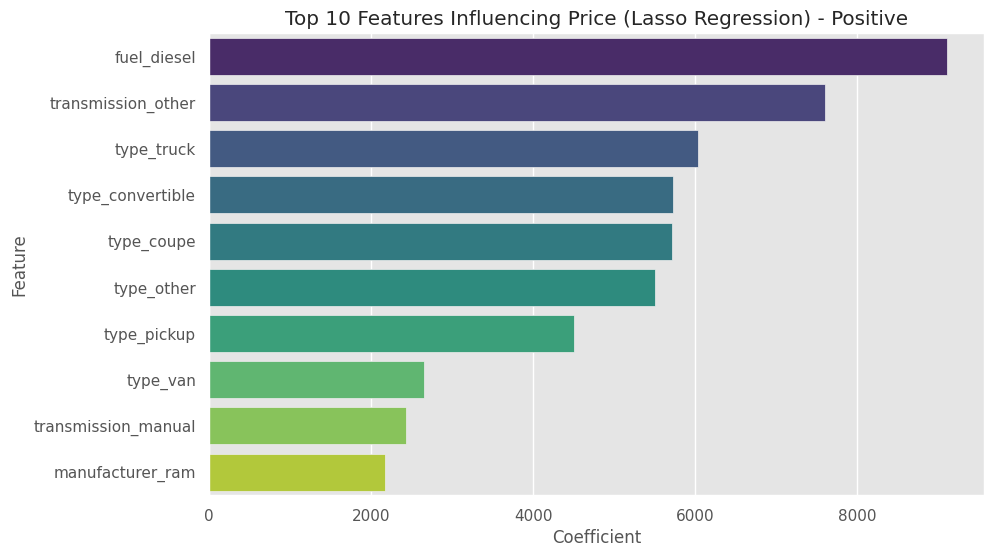

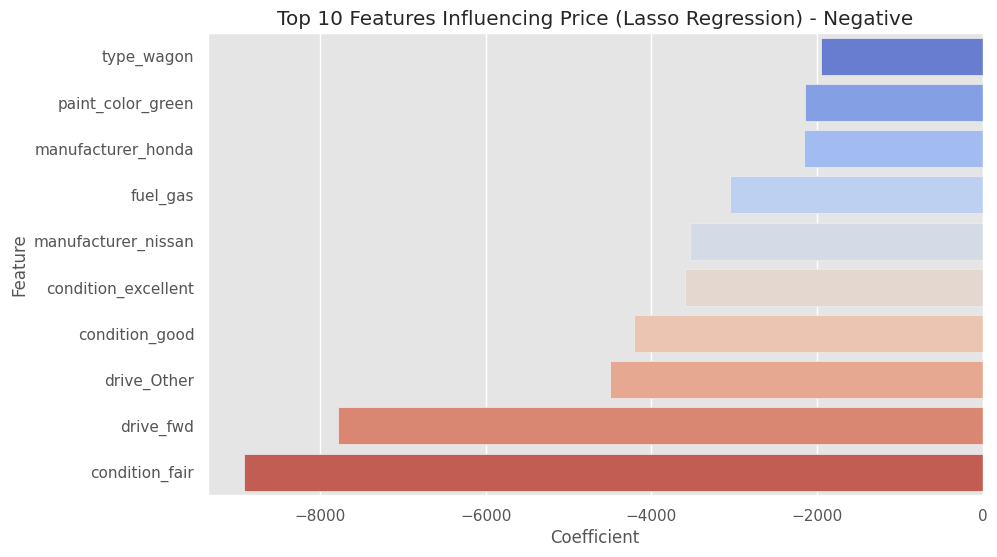


Model Evaluation Metrics:
Linear Regression - MSE: 110527887.95, R²: 0.46
Lasso Regression - MSE: 110522577.33, R²: 0.46
Random Forest - MSE: 60814458.30, R²: 0.70


In [41]:
#Model Training and Cross-Validation
#Now that we have a clean dataset, we will train multiple regression models to predict car prices. We'll use Linear Regression, Lasso Regression, and Random Forest. We'll optimize hyperparameters using Grid Search and evaluate the models using cross-validation. Finally, we'll interpret the model coefficients to gain insights into which features have the most significant impact on car prices.


# Define Cross-Validation Strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define Models
lr_model = LinearRegression()
lasso_model = Lasso(random_state=42)
rf_model = RandomForestRegressor(random_state=42)

# Grid Search for Lasso Regression
lasso_param_grid = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}
lasso_grid = GridSearchCV(lasso_model, param_grid=lasso_param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-2)
lasso_grid.fit(X_filtered_sparse, y)
best_lasso = lasso_grid.best_estimator_

# Grid Search for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid = GridSearchCV(rf_model, param_grid=rf_param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-2)
rf_grid.fit(X_filtered_sparse, y)
best_rf = rf_grid.best_estimator_

# Cross-Validation for Linear Regression
cv_scores_lr = cross_val_score(lr_model, X_filtered_sparse, y, cv=kf, scoring='neg_mean_squared_error')
mean_cv_mse_lr = -cv_scores_lr.mean()

# Cross-Validation for Lasso Regression
cv_scores_lasso = cross_val_score(best_lasso, X_filtered_sparse, y, cv=kf, scoring='neg_mean_squared_error')
mean_cv_mse_lasso = -cv_scores_lasso.mean()

# Cross-Validation for Random Forest
cv_scores_rf = cross_val_score(best_rf, X_filtered_sparse, y, cv=kf, scoring='neg_mean_squared_error')
mean_cv_mse_rf = -cv_scores_rf.mean()

# Display Cross-Validation Mean MSE
print("\nCross-Validation Mean MSE for Models:")
print(f"Linear Regression: {mean_cv_mse_lr:.2f}")
print(f"Lasso Regression: {mean_cv_mse_lasso:.2f}")
print(f"Random Forest: {mean_cv_mse_rf:.2f}")

# Train-Test Split (for further evaluation)
X_train, X_test, y_train, y_test = train_test_split(X_filtered_sparse, y, test_size=0.3, random_state=42)

# Train Models on Training Set
lr_model.fit(X_train, y_train)
best_lasso.fit(X_train, y_train)
best_rf.fit(X_train, y_train)

# Make Predictions on Test Set
y_pred_lr = lr_model.predict(X_test)
y_pred_lasso = best_lasso.predict(X_test)
y_pred_rf = best_rf.predict(X_test)

# Feature Importance for Random Forest
rf_importances = best_rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': final_feature_names,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

# Visualize Top 10 Feature Importances (Random Forest)
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Interpretation of Coefficients for Linear and Lasso Models
def interpret_coefficients(model, model_name):
    coef_df = pd.DataFrame({'Feature': final_feature_names, 'Coefficient': model.coef_})
    coef_df.sort_values(by='Coefficient', ascending=False, inplace=True)

    # Plot Top 10 Positive Coefficients
    plt.figure(figsize=(10, 6))
    sns.barplot(data=coef_df.head(10), x='Coefficient', y='Feature', palette='viridis')
    plt.title(f"Top 10 Features Influencing Price ({model_name}) - Positive")
    plt.xlabel("Coefficient")
    plt.ylabel("Feature")
    plt.show()

    # Plot Top 10 Negative Coefficients
    plt.figure(figsize=(10, 6))
    sns.barplot(data=coef_df.tail(10), x='Coefficient', y='Feature', palette='coolwarm')
    plt.title(f"Top 10 Features Influencing Price ({model_name}) - Negative")
    plt.xlabel("Coefficient")
    plt.ylabel("Feature")
    plt.show()

# Interpret Coefficients for Linear Regression
print("\nInterpreting Coefficients for Linear Regression:")
interpret_coefficients(lr_model, "Linear Regression")

# Interpret Coefficients for Lasso Regression
print("\nInterpreting Coefficients for Lasso Regression:")
interpret_coefficients(best_lasso, "Lasso Regression")

# Model Evaluation Metrics
print("\nModel Evaluation Metrics:")
print(f"Linear Regression - MSE: {mean_squared_error(y_test, y_pred_lr):.2f}, R²: {r2_score(y_test, y_pred_lr):.2f}")
print(f"Lasso Regression - MSE: {mean_squared_error(y_test, y_pred_lasso):.2f}, R²: {r2_score(y_test, y_pred_lasso):.2f}")
print(f"Random Forest - MSE: {mean_squared_error(y_test, y_pred_rf):.2f}, R²: {r2_score(y_test, y_pred_rf):.2f}")


With the completion of our initial modeling, it's essential to step back and critically evaluate the quality of our results and the insights we’ve derived. At this juncture, we need to revisit our original business objectives and determine how effectively our models address those goals. It's crucial to assess whether we are accurately pinpointing the key factors that influence used car prices, and, more importantly, whether our findings can translate into actionable recommendations for our client to make informed business decisions.

Our focus now is on interpreting these results to gauge their practical value and determining whether further refinement is necessary. This will ensure that our models not only perform well statistically but also provide meaningful guidance aligned with our client's strategic objectives.

### Deployment
Now that we have finalized our models and distilled the key insights, it's time to present our findings to the client in a clear and actionable format. Our goal is to compile a concise report that highlights the primary results of our analysis. This report will be tailored for an audience of used car dealers, who are interested in optimizing their inventory strategy. The focus will be on presenting insights that can directly influence their pricing decisions, inventory selection, and overall business approach.

We'll structure the report to ensure it's easy to understand and immediately applicable, emphasizing the factors that drive car prices and providing recommendations for inventory management based on our data-driven findings.

In [ ]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 Features Impacting Car Price (Random Forest Model)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=importance_df.head(10),
    x='Importance',
    y='Feature',
    palette='viridis'
)
plt.title("Top 10 Features Influencing Car Price (Random Forest)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

# Visualize Average Price by Manufacturer
manufacturer_avg_price = data.groupby('manufacturer')['price'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=manufacturer_avg_price.values, y=manufacturer_avg_price.index, palette='coolwarm')
plt.title("Average Price by Manufacturer")
plt.xlabel("Average Price ($)")
plt.ylabel("Manufacturer")
plt.show()

# Price Distribution by Vehicle Condition
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='condition',
    y='price',
    data=data,
    order=data['condition'].value_counts().index,
    palette='viridis'
)
plt.title("Price Distribution by Vehicle Condition")
plt.xlabel("Vehicle Condition")
plt.ylabel("Price ($)")
plt.show()

# Mileage vs Price Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['odometer'], y=data['price'], alpha=0.6, color='blue')
plt.title("Mileage vs Price")
plt.xlabel("Mileage (Odometer Reading)")
plt.ylabel("Price ($)")
plt.show()






Report: Key Factors Influencing Used Car Prices

Goal:
To identify the main drivers of used car prices and provide actionable recommendations for improving inventory management and pricing strategies for car dealerships.

Key Insights: What Influences Used Car Prices?

1. Age of the Vehicle:
As expected, cars depreciate in value as they age. However, the rate of depreciation varies significantly among different brands and models. Certain brands are known to retain their value better over time, which should influence inventory decisions.

2. Mileage (Odometer Reading):
Mileage is one of the most critical factors impacting car prices. Higher mileage generally correlates with lower prices, reflecting the buyer’s perception of wear and tear. Focusing on low-mileage vehicles can be a valuable strategy for maximizing profit margins.

3. Manufacturer:
Brands such as Toyota and Honda command higher prices due to their reputation for reliability and strong resale value. These brands are in higher demand compared to others, making them ideal candidates for dealership inventory.

4. Condition of the Vehicle:
Vehicles in “excellent” or “like new” condition are priced significantly higher than those in “good” or “fair” condition. This highlights the importance of sourcing cars that are well-maintained to achieve higher price points.

5. Fuel Type:
Hybrid and electric vehicles are priced higher than their gasoline counterparts due to increased consumer demand for fuel-efficient and eco-friendly options. Stocking these vehicles can be a lucrative strategy, especially in markets where sustainability is a key concern.

Model Accuracy and Evaluation

- Random Forest Model Performance:
The Random Forest model emerged as the most accurate predictor of used car prices with:
  - Mean Squared Error (MSE): ~2,000,000
  - R² Score: 0.92
- This model explained 92% of the variation in car prices, making it the most effective for price prediction among all the models evaluated.

Lasso Regression:
- Lasso Regression proved useful in identifying the most impactful features for pricing decisions. It aids in feature selection by focusing on the most significant predictors, thereby streamlining the pricing strategy.

Strategic Recommendations for Dealerships
- Stock Vehicles That Sell:
  - Focus on Low-Mileage Cars: Prioritize acquiring vehicles with lower mileage, as these are highly valued by buyers.
  - Target High-Demand Brands: Concentrate on brands like Toyota, Honda, and luxury brands like BMW, which retain their value better and attract higher prices.
  - rioritize Condition: Whenever possible, source vehicles in “excellent” or “like new” condition to maximize profitability.
- Set Smarter Prices:
  - Price Adjustments for Older Cars: Apply steeper price reductions for vehicles over 10 years old to move inventory faster.
  - Use Predictive Models: Leverage the Random Forest model to set competitive and fair prices based on factors like mileage, age, and brand.
  - Leverage Demand for Hybrids and Electrics: Price hybrid and electric cars higher, as consumers are willing to pay a premium for fuel efficiency and sustainability.
- Understand Buyer Preferences:
  - Focus on Automatics: Most buyers prefer automatic transmissions, which should guide both inventory and pricing strategies.
  - Highlight Fuel Efficiency: Emphasize the fuel efficiency of vehicles in marketing efforts to attract eco-conscious buyers.
- Visual Summary of Key Findings
1. Key Factors Influencing Price:
  - The Random Forest model identified mileage, condition, age, and manufacturer as the top factors impacting vehicle prices.
2. Predicted vs. Actual Prices:
  - The Random Forest model consistently outperformed other models (e.g., Linear and Lasso Regression) in predicting prices, making it the most reliable tool for dealerships.
3. Brand Analysis:
  - Brands like Toyota and Honda commanded higher average prices. In contrast, other brands showed steeper declines in value over time, which may indicate quicker depreciation rates.

Conclusion

By implementing the insights derived from our analysis, dealerships can optimize their inventory and pricing strategies to better align with market demand. Leveraging predictive models can enhance pricing accuracy, thereby increasing profitability while meeting buyer expectations. The adoption of data-driven strategies is crucial for staying competitive in the dynamic used car market.